In [1]:
import torch
import numpy as np

In [2]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [4]:
x_ones = torch.ones_like(x_data)
x_ones

tensor([[1, 1],
        [1, 1]])

In [5]:
x_rand = torch.rand_like(x_data, dtype = torch.float)
x_rand

tensor([[0.4585, 0.5966],
        [0.3531, 0.7411]])

In [6]:
# 这是一个包含两个整数的元组，生成一个二维张量
# 一个shape的本质是每一层嵌套列表的长度
shape = (2, 3, )

In [7]:
rand_tensor = torch.rand(shape)
rand_tensor

tensor([[0.1259, 0.1687, 0.9357],
        [0.1229, 0.3297, 0.9095]])

In [8]:
ones_tensor = torch.ones(shape)
ones_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [9]:
zeros_tensor = torch.zeros(shape)
zeros_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [10]:
tensor = torch.rand(3, 4)
tensor

tensor([[0.0510, 0.3700, 0.2253, 0.4510],
        [0.5616, 0.6691, 0.6466, 0.2658],
        [0.9096, 0.4435, 0.0712, 0.6467]])

In [11]:
print(f"Shape of tensor:{tensor.shape}")
print(f"DataType of tensor:{tensor.dtype}")
print(f"Device tensor is stored on:{tensor.device}")

Shape of tensor:torch.Size([3, 4])
DataType of tensor:torch.float32
Device tensor is stored on:cpu


In [12]:
torch.cuda.is_available()

True

In [13]:
device = torch.device("cuda")

tensor = tensor.to(device)

In [14]:
print(f"Shape of tensor:{tensor.shape}")
print(f"DataType of tensor:{tensor.dtype}")
print(f"Device tensor is stored on:{tensor.device}")

Shape of tensor:torch.Size([3, 4])
DataType of tensor:torch.float32
Device tensor is stored on:cuda:0


In [15]:
tensor = torch.rand(4, 4)
tensor

tensor([[0.1713, 0.8082, 0.4766, 0.7439],
        [0.9173, 0.7774, 0.1338, 0.8414],
        [0.9684, 0.4996, 0.4894, 0.3578],
        [0.3141, 0.0701, 0.8453, 0.5963]])

In [16]:
print(f"First row:{tensor[0]}, First row shape:{tensor[0].shape}")
print(f"First column:{tensor[:, 0]}")
# ...表示对前面的所有维度进行:操作，因为这里是二维的，所以等价
print(f"Last column: {tensor[..., -1]}")
print(f"Last column:{tensor[:, -1]}")

First row:tensor([0.1713, 0.8082, 0.4766, 0.7439]), First row shape:torch.Size([4])
First column:tensor([0.1713, 0.9173, 0.9684, 0.3141])
Last column: tensor([0.7439, 0.8414, 0.3578, 0.5963])
Last column:tensor([0.7439, 0.8414, 0.3578, 0.5963])


In [17]:
# ================================
# PyTorch 张量索引与 shape 理解笔记
# ================================

# 一、什么是 shape？
# shape 表示：每一层嵌套结构的长度
# shape 有几项，就表示有几层嵌套
#
# 例如：
# (4,)          → 一维数组，长度 4
# (4,4)         → 二维数组，4 行 4 列
# (2,3,4)       → 三维数组，2 个 3x4 矩阵
# (5,10,28,28)  → 四维数组

# 可以记住一句话：
# shape 有几项 = 嵌套几层


# ================================
# 二、高维张量怎么想象？
# ================================

# 例如：
# x.shape = (5, 10, 28, 28)

# 可以理解为：
# [样本, 通道, 行, 列]

# 想象成：
# 5 个样本
# 每个样本 10 个通道
# 每个通道是 28x28 的矩阵

# 或者类比为：
# 5 本书
# 每本书 10 页
# 每页 28 行 28 列


# ================================
# 三、索引的核心规则
# ================================

# 规则 1：
# 使用整数索引（比如 0、-1）
# → 该维度会被压缩（消失）

# 规则 2：
# 使用切片（比如 0:1、0:2）
# → 该维度保留（只是长度改变）


# ================================
# 四、二维例子理解整数 vs 切片
# ================================

# A.shape = (4,4)

# A[:, 0]
# → 取所有行，第 0 列
# → 结果是一维
# → shape = (4,)

# 结构：
# [a, e, i, m]

# A[:, 0:1]
# → 取所有行，第 0 列（切片）
# → 结果是二维
# → shape = (4,1)

# 结构：
# [
#  [a],
#  [e],
#  [i],
#  [m]
# ]


# ================================
# 五、四维张量索引推理
# ================================

# x.shape = (5, 10, 28, 28)
# 维度含义：
# [样本, 通道, 行, 列]


# 情况 1：
# x[0]
# 第一维整数索引 → 压缩
# 结果：
# (10, 28, 28)


# 情况 2：
# x[:, 0]
# 第二维整数索引 → 压缩
# 结果：
# (5, 28, 28)


# 情况 3：
# x[:, 0, :, 0]
# 第二维整数索引 → 压缩
# 第四维整数索引 → 压缩
# 结果：
# (5, 28)


# 情况 4：
# x[:, 0:1, :, 0]
# 第二维是切片 → 保留
# 第四维是整数 → 压缩
# 结果：
# (5, 1, 28)


# 情况 5：
# x[:, 0:2, :, 0]
# 第二维是切片 → 保留（长度变 2）
# 第四维整数索引 → 压缩
# 结果：
# (5, 2, 28)


# 情况 6：
# x[:, 0:2, :, 0:1]
# 第二维切片 → 保留（长度 2）
# 第四维切片 → 保留（长度 1）
# 结果：
# (5, 2, 28, 1)


# ================================
# 六、终极记忆口诀
# ================================

# 整数索引 → 拿一个元素 → 那一维消失
# 切片索引 → 拿一段 → 那一维还在

# 0      → 取一个 → 压缩维度
# 0:1    → 取一个范围 → 保留维度
# 0:2    → 取两个 → 保留维度（长度变2）


# ================================
# 七、为什么这很重要？
# ================================

# 深度学习中常见输入格式：
# (batch, channel, height, width)

# 有时即使某个维度长度是 1
# 也必须保留该维度
# 否则模型会报错

# 所以：
# 保留维度 vs 压缩维度
# 在实际网络中非常关键


# ================================
# 八、总结
# ================================

# 1. shape 表示嵌套层级结构
# 2. 整数索引会削维
# 3. 切片不会削维
# 4. 推理时逐维分析
# 5. 维度变化=从左到右依次判断是否压缩

# 掌握以上规则后：
# 任何高维张量索引都可以机械推出来


In [18]:
tensor = torch.ones(4, 4)
tensor[:, 1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [19]:
t1 = torch.cat([tensor, tensor, tensor], dim=-1)
print(t1)
print(t1.shape)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])
torch.Size([4, 12])


In [20]:
# ==========================================
# PyTorch 中 dim 的完整理解笔记
# ==========================================

# 一、dim 的本质是什么？
# dim 表示：沿着哪一个维度进行操作
# 换句话说：
# dim 指定“哪个维度的长度会发生变化”

# 维度编号规则：
# 从左到右编号，从 0 开始

# 例如：
# shape = (5, 10, 28, 28)
# dim=0 → 5   （样本维）
# dim=1 → 10  （通道维）
# dim=2 → 28  （行）
# dim=3 → 28  （列）

# 负数 dim 表示从右往左数：
# dim=-1 → 最后一维
# dim=-2 → 倒数第二维
# dim=-3 → 倒数第三维
# dim=-4 → 倒数第四维


# ==========================================
# 二、二维情况下的 dim 理解
# ==========================================

# A.shape = (4,4)

# dim=0 → 行方向（向下拼接）
# dim=1 → 列方向（向右拼接）

# 举例：
# torch.cat([A, A], dim=0)
# → 纵向拼接
# → shape 变成 (8,4)

# torch.cat([A, A], dim=1)
# → 横向拼接
# → shape 变成 (4,8)

# 记忆方法：
# dim=0 → 行数增加
# dim=1 → 列数增加


# ==========================================
# 三、三维情况下的 dim
# ==========================================

# x.shape = (2, 3, 4)
# 可以理解为：
# (块, 行, 列)

# dim=0 → 块数增加
# dim=1 → 行数增加
# dim=2 → 列数增加

# 例如：
# torch.cat([x, x], dim=1)
# shape 从 (2,3,4)
# 变成 (2,6,4)


# ==========================================
# 四、四维图像例子（最常见）
# ==========================================

# x.shape = (5, 10, 28, 28)
# 语义理解为：
# (batch, channel, height, width)

# dim=0 → 增加样本数量
# dim=1 → 增加通道数量
# dim=2 → 增加高度（纵向变大）
# dim=3 → 增加宽度（横向变大）
# dim=-1 等价于 dim=3


# ==========================================
# 五、具体例子总结
# ==========================================

# 原始：
# x.shape = (5, 10, 28, 28)

# 1）torch.cat([x, x], dim=0)
# → (10, 10, 28, 28)
# 含义：样本数量翻倍

# 2）torch.cat([x, x], dim=1)
# → (5, 20, 28, 28)
# 含义：每个样本通道翻倍

# 3）torch.cat([x, x], dim=2)
# → (5, 10, 56, 28)
# 含义：高度翻倍（纵向拼接）

# 4）torch.cat([x, x], dim=3)
# → (5, 10, 28, 56)
# 含义：宽度翻倍（横向拼接）

# 5）torch.cat([x, x], dim=-1)
# → 等价于 dim=3


# ==========================================
# 六、最核心的理解公式
# ==========================================

# 对于：
# shape = (d0, d1, d2, ..., dn)

# 如果：
# torch.cat(..., dim=k)

# 那么：
# 只有 dk 会变大
# 其他维度必须保持一致


# ==========================================
# 七、dim 的思维模型
# ==========================================

# 把张量想成多层嵌套盒子：
# dim 指定你在哪一层盒子上做“扩展”

# 举例：
# (5, 10, 28, 28)
# 就是：
# 5 个大盒子
# 每个大盒子 10 个中盒子
# 每个中盒子 28 行
# 每行 28 个元素

# dim=1 就是在“中盒子数量”那一层增加
# dim=2 就是在“行数量”那一层增加
# dim=3 就是在“列数量”那一层增加


# ==========================================
# 八、终极记忆方式
# ==========================================

# dim = 哪个维度的长度会变大
# dim = 从左往右编号
# dim = 负数时从右往左数

# 只要盯住 shape：
# 看第几个数字变大
# 就能理解 dim 的意义


In [21]:
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [22]:
print(tensor.T)

tensor([[1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [23]:
y1 = tensor @ tensor.T
print(y1)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [24]:
y2 = tensor.matmul(tensor.T)
print(y2)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [25]:
# @是矩阵乘法，等价于torch.matmul(A, B)，等价A.matmul(B)

In [26]:
y3 = torch.rand_like(y1)
print(y3)

tensor([[0.2343, 0.3072, 0.7460, 0.0704],
        [0.9397, 0.1483, 0.2693, 0.8653],
        [0.1258, 0.6016, 0.8309, 0.2629],
        [0.1074, 0.8717, 0.0952, 0.2974]])


In [27]:
torch.matmul(tensor, tensor.T, out=y3)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [28]:
# out=y3的意思是把结果写进y3里面
print(y3)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [29]:
# 这个是逐元素乘法，不是矩阵乘法
z1 = tensor * tensor
print(z1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [30]:
z2 = tensor.mul(tensor)
print(z2)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [31]:
z3 = torch.rand_like(tensor)
print(z3)

tensor([[0.1481, 0.3081, 0.0723, 0.8016],
        [0.6926, 0.2996, 0.8987, 0.3498],
        [0.7652, 0.7044, 0.8002, 0.0435],
        [0.2186, 0.2178, 0.3723, 0.0752]])


In [32]:
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [33]:
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [34]:
agg = tensor.sum()
print(agg)

tensor(12.)


In [35]:
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [36]:
print(f"{tensor} \n")
# 函数名字中带下划线的就是原地修改，但是不推荐用
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [37]:
t = torch.ones(5)
print(f"t:{t}")
n = t.numpy()
print(f"n:{n}")

t:tensor([1., 1., 1., 1., 1.])
n:[1. 1. 1. 1. 1.]


In [38]:
# 共享底层内存，一个变化另一个也会变化
t.add_(1)
print(f"t:{t}")
print(f"n:{n}")

t:tensor([2., 2., 2., 2., 2.])
n:[2. 2. 2. 2. 2.]


In [39]:
n = np.ones(5)
t = torch.from_numpy(n)

In [40]:
n

array([1., 1., 1., 1., 1.])

In [41]:
t

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [42]:
np.add(n, 1, out=n)

array([2., 2., 2., 2., 2.])

In [43]:
t

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)

In [44]:
# ==========================================
# Fashion-MNIST 数据集理解笔记
# ==========================================

# 一、数据集基本信息
# ------------------------------------------
# Fashion-MNIST 是一个图像分类数据集
# 训练集：60000 张图片
# 测试集：10000 张图片
# 总类别数：10 类（不同种类的服装）


# ==========================================
# 二、单张图片的结构
# ==========================================

# 每张图片大小：
# 28 × 28 像素

# 是灰度图（grayscale）
# 灰度图只有 1 个通道

# 在 PyTorch 中通常表示为：
# (channel, height, width)

# 所以单张图片的 shape 是：
# (1, 28, 28)

# 解释：
# channel = 1（只有亮度信息）
# height  = 28
# width   = 28


# ==========================================
# 三、什么是“通道”？
# ==========================================

# 通道表示“不同种类的像素信息层”

# 灰度图：
# 1 个通道（只有亮度）

# 彩色图：
# 3 个通道（R、G、B）

# 每个通道本质上是一个二维矩阵


# ==========================================
# 四、像素是什么？
# ==========================================

# 像素是一个数值
# 表示该位置的亮度大小

# 原始范围通常：
# 0   → 黑色
# 255 → 白色

# 在深度学习中通常会归一化到：
# 0~1 之间


# ==========================================
# 五、整个训练集长什么样？
# ==========================================

# 如果把 60000 张图片堆叠在一起：

# images.shape = (60000, 1, 28, 28)

# 解释：
# 60000 个样本
# 每个样本 1 个通道
# 每个通道 28×28


# ==========================================
# 六、标签结构
# ==========================================

# 每张图片对应一个类别编号

# 标签 shape：
# labels.shape = (60000,)

# 每个标签是一个整数：
# 0~9


# ==========================================
# 七、数据的一条样本结构
# ==========================================

# 第 i 个样本：

# image = images[i]   # shape = (1, 28, 28)
# label = labels[i]   # 一个整数

# 含义：
# image 是一张 28×28 的灰度图
# label 表示图片属于哪个类别


# ==========================================
# 八、批量数据（DataLoader）
# ==========================================

# 如果 batch_size = 64

# 一个 batch 的图像 shape：
# (64, 1, 28, 28)

# 标签 shape：
# (64,)

# 含义：
# 一次送入网络 64 张图片


# ==========================================
# 九、本质理解
# ==========================================

# Fashion-MNIST 本质是：

# 一个四维张量（图片数据）
# +
# 一个一维张量（标签）

# 所谓“图像数据集”
# 本质就是：
# 多维数组 + 分类标签


# ==========================================
# 十、终极理解
# ==========================================

# 真实世界图像
#     ↓
# 像素数值
#     ↓
# 28×28 数字矩阵
#     ↓
# (1,28,28) 张量
#     ↓
# (60000,1,28,28) 数据集


In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()    # 把图片转换成张量
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [2]:
print(training_data)
print(len(training_data))

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
60000


In [3]:
print(training_data[0])
print(len(training_data[0]))
print(type(training_data[0]))

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000

In [4]:
# 1是灰度图的单通道，每个通道就是一个28*28的灰度矩阵，元素表示亮度
print(training_data[0][0].shape)

torch.Size([1, 28, 28])


In [5]:
# 可视化训练数据的样本
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

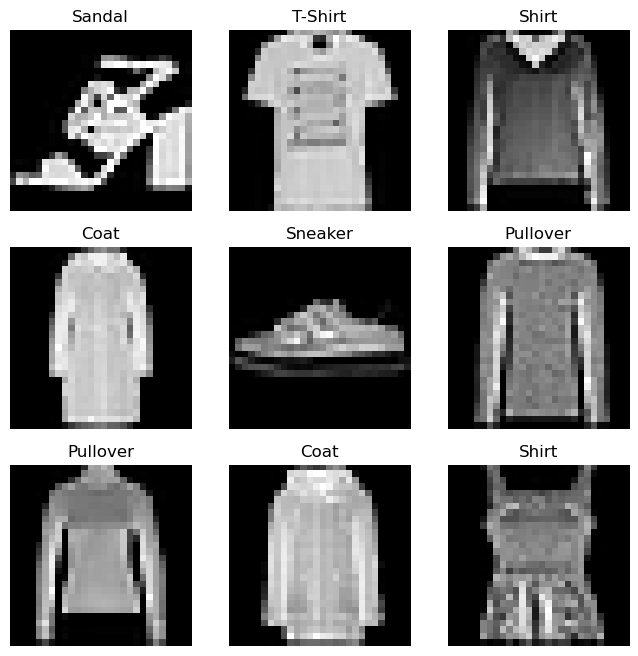

In [ ]:
figure = plt.figure(figsize=(8, 8)) # 创建一个画板，大小是8*8
cols, rows = 3, 3   # 想画10个子图来展示
for i in range(1, cols * rows + 1):
    # 生成一个0-59999范围内的随机一维张量，然后变成python的数字
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]  # 找到这个随机数的图片和标签
    figure.add_subplot(rows, cols, i)   # 在3*3的第i个位置添加一个子图
    plt.title(labels_map[label])    # 显示这个子图的标签
    plt.axis("off") # 不打印X轴和Y轴
    plt.imshow(img.squeeze(), cmap="gray")  #squeeze()去掉为1的维度，以灰度方式展示
plt.show()

In [17]:
# 处理自己的图片数据，标签存在csv文件里面
import os
import pandas as pd
from torchvision.io import decode_image # 把图片文件读取成Tensor

# 继承PyTorch的Dataset基类，必须实现下面三个函数
# Dataset解决的是第i个样本是什么，每次通过geitem返回一张图片，一个标签
# 因此需要DataLoader
class CustomImageDataset(Dataset):
    # 参数分别表示：标签CSV所在文件路径，图片所在文件夹，图片预处理，标签预处理
    # 读取标签文件变成DataFrame，保存图片路径文件夹，预处理函数
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    # 告诉DataLoader这个数据集有多少样本
    def __len__(self):
        return len(self.img_labels)
    
    # 取出样本
    def __getitem__(self, idx):
        # iloc()是pandas的索引方式，这里的img_labels是一个pandas.DataFrame，用这个索引意思是df.iloc[1, 0]df的第1行第0列
        # 把图片路径和第idx行的第0列拼接，因为这个位置是图片名称，得到idx这张图片的路径
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        # 把文件读成Tensor格式，比如彩色图就是(3, H, W)
        # decode_image是把图片文件解码成原始的Tensor
        # 但是对深度学习的训练不友好，简而言之，没有数据预处理
        # 因此在下面给出数据预处理的方式，对于图片和标签
        # 例如ToTensor就是把tensor进行类型转换，数值归一化，等操作
        image = decode_image(img_path)
        # 读取标签，就是第idx行的第1列，是图片标签
        label = self.img_labels.iloc[idx, 1]
        # 图片预处理，比如transform可以是ToTensor()
        if self.transform:
            image = self.transform(image)
        # 标签预处理
        if self.target_transform:
            label = self.target_transform(label)
        # 返回一个样本
        return image, label

In [18]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [19]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [20]:
# 补一下深度学习的知识……
# 首先epoch的意思是，一次epoch，模型完整的看完整个训练集一次
# 但是模型不是一次读完全部训练集，而是每次读一个batch，然后一个batch更新一次参数，这叫做小批量更新
# 所以对于一次epoch，训练集被拆成很多batch，模型会在一次epoch里面更新好几次参数
# 在每一个batch里面，前向传播，计算loss，反向传播，然后更新参数

In [21]:
# DataLoader不存储数据，只是动态地不断调用Dataset
# DataLoader就是批量样本生成器
# 一个会返回 (images_batch, labels_batch) 的迭代器
train_dataloader

In [22]:
# 这是一个batch，每一行都是dataset的getitem()
# [
#     (img0, label0),
#     (img1, label1),
#     (img2, label2),
#     (img3, label3)
# ]
# 在dataloader内部有default_collate机制，把列表里面相同位置的元素分别堆叠起来
# (
#     stack([img0, img1, img2, img3]),
#     tensor([label0, label1, label2, label3])
# )
# 维度就变成
# images.shape = (4, 1, 28, 28)
# labels.shape = (4,)
# 所以dataloader返回的就是(images_batch, labels_batch)

In [23]:
iter(train_dataloader) # 创建一个迭代器对象，记住当前batch位置和索引顺序
next(iter(train_dataloader)) # 取出第一个batch
# 返回两个拼接好的tensor，每一个就是一个dataset拿出来的样本，然后一共64个

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [24]:
print(len(next(iter(train_dataloader))))

2


In [25]:
# 64个样本，灰度图1个通道，每个通道是28*28的矩阵，元素就是这个点的亮度
next(iter(train_dataloader))[0].shape

torch.Size([64, 1, 28, 28])

In [26]:
next(iter(train_dataloader))[1].shape

torch.Size([64])

In [27]:
train_features, train_labels = next(iter(train_dataloader)) # 所以这里就是取出第一个batch
print(f"Features batch shape:{train_features.shape}")
print(f"Labels batch shape:{train_labels.shape}")


Features batch shape:torch.Size([64, 1, 28, 28])
Labels batch shape:torch.Size([64])


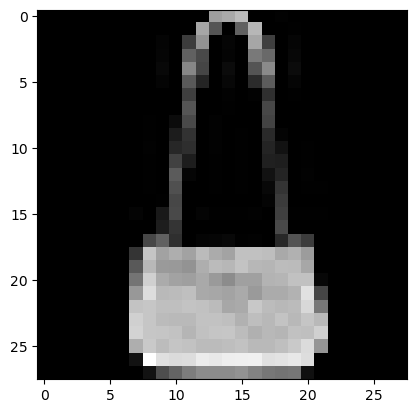

Label:Bag


In [30]:
img = train_features[0].squeeze()   # 这里的意思是拿到第一个样本，删除值为1的维度因为图片是二维的
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label:{labels_map[label.item()]}")

In [40]:
# 图片在计算机上面的存储形式，png/jpg，是压缩的二进制数据
# 读取图片的方式有多种：PIL是Python的图像对象，decode_image得到的是tensor
# 这两种都没有预处理，ToTensor()的作用就是返回预处理后的Tensor

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

# 这里的transform和target_transform就是对于图像和标签的变换
# FashionMNIST的图片是PILImage格式，标签是整数
# 通过ToTensor变成标准化后的张量，标签变成独热编码张量
ds = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    # 内部lambda函数的意思是，先生成一个长度为10的全0张量，然后在第0维度的第y个位置把他变成1，就是独热编码的意思
    # 外部的Lambda()是把一个函数包装成transform对象，这是torchvision的要求
    # scatter_(dim, index, value)要求index必须是一个tensor，可以填多个位置
    target_transform = Lambda(lambda y: torch.zeros(10, dtype = torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [ ]:
# 标量也是张量，0维tensor
torch.tensor(3).shape

torch.Size([1])

In [45]:
torch.tensor(3)

tensor(3)

In [46]:
torch.tensor([3])

tensor([3])

In [44]:
torch.tensor([3]).shape

torch.Size([1])

In [47]:
ds

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Target transform: Lambda()

In [48]:
ds[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [49]:
ds[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [ ]:
# 第一个样本的数据维度
ds[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
# 第一个样本的独热编码的维度
ds[0][1].shape

torch.Size([10])

In [55]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [57]:
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"
device

device(type='cuda')

In [58]:
ds[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
# 图像分类的三层全连接网络，MLP多层感知机
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()  # 这个是必写的，调用父类nn.Model的构造函数，初始化参数注册系统
        # 定义一个展平层把(1, 28, 28) -> (784)
        # 展平层的默认行为是，从第1维开始展平，因为第0维是样本个数batch_size
        # 没有改变数值，只是改变形状，把三维数组按顺序排成一维向量
        # 因为我们后面的第一个层是线性层，需要二维矩阵的输入，所以需要展平
        self.flatten = nn.Flatten()
        #nn.Sequential是一个顺序执行的层容器
        self.linear_relu_stack = nn.Sequential(
            # 线性层，输入784（28*28）输出512
            nn.Linear(28*28, 512),
            # 激活函数ReLU(x) = max(0, x)
            nn.ReLU(),
            # 第二个隐藏层
            nn.Linear(512, 512),
            # 激活函数
            nn.ReLU(),
            # 输出层
            nn.Linear(512, 10),
        )

    def forward(self, x):
        # 展平数据(batch, 1, 28, 28) -> (batch, 784)
        x = self.flatten(x)
        # 经过变换输出每一类的概率，没有加上Softmax层输出的就是原始分数
        # 原始分数不是概率，需要通过SoftMax层变成概率，这个原始分数会在后面调用
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork().to(device)
print(model)
# bias表示加入偏执项，也就是线性模型的b

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
# 随意构造一个和样本相同维度的向量
X = torch.rand(1, 28, 28, device=device)
X

tensor([[[7.4605e-01, 2.6898e-01, 3.2711e-02, 2.2193e-01, 2.7641e-01,
          4.7937e-01, 1.6686e-01, 3.5639e-01, 7.5657e-01, 5.2606e-02,
          9.4888e-01, 7.8240e-01, 8.0013e-01, 6.1866e-01, 8.6774e-02,
          5.0239e-01, 3.4357e-01, 3.6953e-01, 8.8873e-01, 6.0976e-01,
          4.1938e-01, 2.4218e-02, 6.4894e-01, 5.1898e-01, 1.6920e-01,
          3.7576e-01, 3.3372e-01, 2.9698e-03],
         [6.7088e-01, 4.8680e-01, 7.5789e-01, 6.1486e-02, 7.5198e-01,
          4.5396e-02, 6.5681e-01, 5.3807e-03, 8.7364e-01, 3.6660e-01,
          9.8058e-01, 7.2313e-01, 5.0185e-01, 7.6478e-01, 5.3558e-01,
          7.2944e-01, 9.6432e-01, 2.1248e-02, 4.7947e-01, 7.0015e-02,
          1.3110e-01, 3.2759e-01, 4.7682e-01, 5.6984e-01, 1.4158e-01,
          6.6278e-01, 3.2586e-01, 7.0428e-01],
         [7.3137e-01, 8.4037e-01, 7.7467e-01, 8.4832e-01, 6.9749e-01,
          8.8315e-01, 3.0223e-02, 2.7869e-01, 1.9040e-01, 7.4453e-01,
          2.2532e-01, 2.1687e-01, 4.8825e-01, 6.7935e-01, 4.9380e-

In [ ]:
# 会输出它的分数，也就是前向传播的结果
# 现在我们一点没训练，他会用自动随机生成的参数
logits = model(X)
logits

tensor([[ 0.0134, -0.0481, -0.0380, -0.0510, -0.0352, -0.0391,  0.0526, -0.0187,
          0.0215,  0.0516]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
# logits分数要经过softmax层变成概率
# 下面的写法等价，dim=1表示在这一维做归一化
# 因为我们的输出是(batch, 10)，dim=1的维度才是概率
# softmax_layer = nn.Softmax(dim=1)
# pred_prob = softmax_layer(logits)

pred_probab = nn.Softmax(dim=1)(logits)
pred_probab

tensor([[0.1022, 0.0961, 0.0971, 0.0958, 0.0973, 0.0970, 0.1063, 0.0990, 0.1030,
         0.1062]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [ ]:
pred_probab.shape
# 这是个一行十列的数组，但是其实一行没啥意义了现在

torch.Size([1, 10])

In [68]:
pred_probab[0]

tensor([0.1022, 0.0961, 0.0971, 0.0958, 0.0973, 0.0970, 0.1063, 0.0990, 0.1030,
        0.1062], device='cuda:0', grad_fn=<SelectBackward0>)

In [ ]:
# argmax找最大的值所在的索引，传入1表示在dim=1这个维度
# 因为我们的输入是(batch, 10)，值在dim=1这一维
y_pred = pred_probab.argmax(1)
y_pred

tensor([6], device='cuda:0')

In [72]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())
print(input_image.shape)

torch.Size([3, 28, 28])
torch.Size([3, 28, 28])


In [73]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [74]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [ ]:
print(f"Before ReLU:{hidden1}\n\n")
# 这里的方式跟前面的softmax很像
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU:{hidden1}")

Before ReLU:tensor([[-0.0138, -0.0011, -0.0037,  0.0456,  0.3523,  0.5401, -0.0357,  0.0348,
         -0.2106,  0.1855,  0.2641,  0.2732, -0.3406,  0.1666,  0.4613, -0.0436,
         -0.1941,  0.3181, -0.0301, -0.0358],
        [-0.0301, -0.1831, -0.2253,  0.4703,  0.3207,  0.2763, -0.3469,  0.3952,
          0.0626,  0.4506,  0.3648,  0.5007, -0.7463,  0.1737,  0.0411, -0.0826,
         -0.3782,  0.0880, -0.1472,  0.0630],
        [ 0.0400, -0.1162, -0.0217,  0.6933,  0.4115,  0.2072, -0.1337,  0.0468,
          0.3010,  0.0820,  0.1944,  0.1245, -0.3679,  0.1284,  0.0333, -0.2275,
         -0.3942,  0.0270, -0.1574, -0.3041]], grad_fn=<AddmmBackward0>)


After ReLU:tensor([[0.0000, 0.0000, 0.0000, 0.0456, 0.3523, 0.5401, 0.0000, 0.0348, 0.0000,
         0.1855, 0.2641, 0.2732, 0.0000, 0.1666, 0.4613, 0.0000, 0.0000, 0.3181,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.4703, 0.3207, 0.2763, 0.0000, 0.3952, 0.0626,
         0.4506, 0.3648, 0.5007, 0.0000, 0.1737, 0.0411

In [78]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
logits

tensor([[ 0.2039, -0.0507, -0.2089,  0.1411,  0.1569,  0.1641,  0.1267, -0.0837,
         -0.0520, -0.1801],
        [ 0.1637, -0.0833, -0.2358,  0.1238,  0.1152,  0.1397,  0.1145, -0.0773,
          0.0415, -0.1397],
        [ 0.2434, -0.1924, -0.2030,  0.1506,  0.2501,  0.0664,  0.2268, -0.1315,
         -0.1197, -0.1712]], grad_fn=<AddmmBackward0>)

In [80]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab

tensor([[0.1187, 0.0920, 0.0786, 0.1115, 0.1133, 0.1141, 0.1099, 0.0891, 0.0919,
         0.0809],
        [0.1149, 0.0898, 0.0771, 0.1104, 0.1095, 0.1122, 0.1094, 0.0903, 0.1017,
         0.0848],
        [0.1239, 0.0801, 0.0793, 0.1129, 0.1248, 0.1038, 0.1219, 0.0852, 0.0862,
         0.0819]], grad_fn=<SoftmaxBackward0>)

In [82]:
print(f"Model structure:{model}")

Model structure:NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
# named_parameters()只返回有参数的层
# param是一个张量，param[:2]表示取前两行
for name, param in model.named_parameters():
    print(f"Layer:{name} | Size:{param.size()} | Values:{param[:2]}")

Layer:linear_relu_stack.0.weight | Size:torch.Size([512, 784]) | Values:tensor([[-0.0004,  0.0166, -0.0162,  ..., -0.0321, -0.0206, -0.0320],
        [-0.0067, -0.0077,  0.0292,  ..., -0.0036, -0.0297, -0.0334]],
       device='cuda:0', grad_fn=<SliceBackward0>)
Layer:linear_relu_stack.0.bias | Size:torch.Size([512]) | Values:tensor([-0.0146,  0.0185], device='cuda:0', grad_fn=<SliceBackward0>)
Layer:linear_relu_stack.2.weight | Size:torch.Size([512, 512]) | Values:tensor([[-0.0156, -0.0092,  0.0015,  ...,  0.0139,  0.0031,  0.0341],
        [-0.0148,  0.0360, -0.0005,  ..., -0.0180, -0.0101, -0.0206]],
       device='cuda:0', grad_fn=<SliceBackward0>)
Layer:linear_relu_stack.2.bias | Size:torch.Size([512]) | Values:tensor([0.0212, 0.0115], device='cuda:0', grad_fn=<SliceBackward0>)
Layer:linear_relu_stack.4.weight | Size:torch.Size([10, 512]) | Values:tensor([[ 0.0042, -0.0156,  0.0281,  ..., -0.0098,  0.0260, -0.0301],
        [-0.0318, -0.0381, -0.0201,  ...,  0.0352, -0.0367, -0.01

In [86]:
# 自动微分，大的要来了
import torch

x = torch.ones(5)
x

tensor([1., 1., 1., 1., 1.])

In [94]:
y = torch.zeros(3)
y

tensor([0., 0., 0.])

In [ ]:
# requires_grad表示这个是叶子参数
# 叶子节点是，他是用户直接创建的，设置了requires_grad参数以及他不是由其他tensor运算得到的
# 只有叶子节点会自动保存.grad，虽然PyTorch会计算所有节点的梯度，但是只存叶子节点的梯度
# 没有grad_fn，但是有.grad存储梯度
# .grad存储loss对这个张量的导数，并且只有requires_grad=True且是叶子节点才会保存
w = torch.randn(5, 3, requires_grad=True)
w

tensor([[ 2.1452, -0.7539, -0.3193],
        [ 1.2691,  0.0286,  0.1710],
        [-0.9315, -0.4256,  1.2780],
        [ 0.1712,  2.1195, -1.2309],
        [-0.1129,  1.3521,  0.6836]], requires_grad=True)

In [96]:
b = torch.randn(3, requires_grad=True)
b

tensor([ 1.0832, -1.3358,  0.7783], requires_grad=True)

In [ ]:
# 这里你发现这个也是中间计算结果，他也有grad_fn
# grad_fn记录这个张量是怎么计算出来的
torch.matmul(x, w)

tensor([2.5411, 2.3208, 0.5824], grad_fn=<SqueezeBackward4>)

In [ ]:
# 中间计算结果，有grad_fn，默认不保存.grad
# 非叶子节点，存储前向传播的信息和后向传播的求导规则
z = torch.matmul(x, w) + b
z

tensor([3.6243, 0.9849, 1.3607], grad_fn=<AddBackward0>)

In [ ]:
# torch.nn.functional是PyTorch提供的函数式接口集合
# binary_corss_entropy_with_logits()是二分类交叉熵损失（带logits版本）
# 这一步就是计算z和y之间的误差，返回一个误差值

# 最终loss，标量，有grad_fn，因为他也是由运算产生的，反向传播也从这里开始
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
loss

tensor(2.1806, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [101]:
# 对tensor做运算的时候，PyTorch会构建一个计算图
# 对于计算图中的每个对象，都知道如何做前向计算，如何做反向求导
# grad_fn存储反向传播的规则，也会保存前向传播时需要用于求导的中间信息
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x000002981EDA0EE0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x000002981EDA0670>


In [ ]:
# 反向传播的标准形式，沿着计算图反向执行链式法则
# 到了非叶子节点，就计算loss对这个节点的梯度，根据grad_fn
# 这样子逐步求导，就是链式法则
# 到了叶子节点，就把目前计算的梯度存入.grad
# 计算图在执行一次反向传播之后会自动销毁，除非指定参数retain_graph=True
loss.backward()

In [103]:
print(w.grad)

tensor([[0.3247, 0.2427, 0.2653],
        [0.3247, 0.2427, 0.2653],
        [0.3247, 0.2427, 0.2653],
        [0.3247, 0.2427, 0.2653],
        [0.3247, 0.2427, 0.2653]])


In [104]:
print(b.grad)

tensor([0.3247, 0.2427, 0.2653])


In [105]:
# 只有训练过程需要跟踪梯度，其他不需要更新参数的时候可以把它关了
with torch.no_grad():
    z = torch.matmul(x, w) + b
print(z.requires_grad)

False


In [107]:
# 或者对张量使用detach()关闭
z = torch.matmul(x, w) + b
z_det = z.detach()
print(z_det.requires_grad)

False


In [133]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = NeuralNetwork().to(device)

In [134]:
# 超参数是可调节的参数，可以控制模型优化过程
# epoch，迭代训练集的次数 - 原来根本就不叫训练次数
# batch_size，每次训练的样本大小
# learning_rate，学习率，更新模型参数的超参数

In [135]:
# ================================
# 一、Epoch / Train / Test 的关系
# ================================

# 严格定义：
# 一个 epoch = 训练集完整跑一遍（所有 batch 都训练一次）

# 工程实践中：
# 一个 epoch 通常包含：
#   1️⃣ Train Loop（训练阶段）
#   2️⃣ Validation/Test Loop（评估阶段）
# 但只有训练阶段会更新参数


# ================================
# 二、训练阶段发生什么？
# ================================

# 训练阶段的数据：
# (X_train, y_train) 都是已知的

# 每个 batch 的训练流程：
# 1️⃣ forward：预测
# 2️⃣ 计算 loss（预测 vs 真实标签）
# 3️⃣ backward：反向传播
# 4️⃣ optimizer.step()：更新参数
# 5️⃣ optimizer.zero_grad()：清空梯度

# 关键：
# 训练阶段会更新参数


# ================================
# 三、测试阶段发生什么？
# ================================

# 测试阶段的数据：
# (X_test, y_test) 也是已知的
# 但测试阶段不更新参数

# 每个 batch 的测试流程：
# 1️⃣ forward：预测
# 2️⃣ 计算 loss（预测 vs 真实标签）
# 3️⃣ 不 backward
# 4️⃣ 不更新参数

# 测试阶段通常写成：
# model.eval()
# with torch.no_grad():
#     for X, y in test_loader:
#         output = model(X)
#         loss = loss_fn(output, y)

# 关键：
# 测试阶段只是评估模型表现，不改变模型


# ================================
# 四、为什么 test 也用 batch？
# ================================

# 即使是测试集，也要用 DataLoader 分批：
# 1️⃣ 显存限制（大数据无法一次性送入模型）
# 2️⃣ GPU 计算更适合 batch 处理
# 3️⃣ 代码结构统一（train_loader / test_loader）


# ================================
# 五、训练 loss 和测试 loss 的区别
# ================================

# 训练 loss：
# - 用来计算梯度
# - 用来更新参数

# 测试 loss：
# - 只是用来评估模型泛化能力
# - 不参与参数更新

# 所以区别不是“有没有真实标签”
# 两者都有真实标签
# 区别是“是否更新参数”


# ================================
# 六、模型到底“知道”什么？
# ================================

# 模型本质只是一个函数：
# f(X) -> 预测值

# 模型从来不“知道”标签
# 是我们在训练流程中用标签计算 loss


# ================================
# 七、一次完整 epoch 的时间线
# ================================

# for epoch in range(num_epochs):

#     # 训练阶段
#     model.train()
#     for X, y in train_loader:
#         output = model(X)
#         loss = loss_fn(output, y)
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()

#     # 测试阶段
#     model.eval()
#     with torch.no_grad():
#         for X, y in test_loader:
#             output = model(X)
#             loss = loss_fn(output, y)
#             # 统计平均 loss / accuracy


# ================================
# 八、层级关系总结
# ================================

# iteration = 一个 batch
# epoch = 所有 batch 跑一遍训练集
# 多个 epoch = 模型逐渐收敛的过程

# Train Loop 负责“学习”
# Test Loop 负责“评估”


# ================================
# 九、核心理解一句话
# ================================

# 训练：算 loss + 反向传播 + 更新参数
# 测试：算 loss + 不更新参数

# epoch 是训练单位
# test 是监控手段


In [136]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [137]:
# 损失函数loss有很多种，由任务类型决定
loss_fn = nn.CrossEntropyLoss()

In [138]:
# 绝大多数的深度学习优化器本质都是基于梯度的优化方法
# 通过注册需要训练的参数并传入学习率来初始化优化器
# 1️⃣ optimizer.zero_grad()
# 2️⃣ loss.backward()
# 3️⃣ optimizer.step()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [139]:
iter(train_dataloader)
next(iter(train_dataloader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [140]:
len(next(iter(train_dataloader)))

2

In [141]:
next(iter(train_dataloader))[0]

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [142]:
next(iter(train_dataloader))[0].shape

torch.Size([64, 1, 28, 28])

In [143]:
train_dataloader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [144]:
len(train_dataloader.dataset)

60000

In [145]:
60000 / 64

937.5

In [146]:
len(train_dataloader)

938

In [147]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    # 这里取的是每一个batch，因为loader不就是每次生成一个batch吗
    # 但是一个batch，就是batch_size个样本
    # 然后一个batch上面看不就是第一个是X，第二个是y嘛
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            # current是已经处理的样本数量
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            # tensor.item()的作用是把只包含一个元素的tensor转换成python标量
            # 这个相当于还是按照batch计算很多loss，但是最后会取平均所以是累加
            test_loss += loss_fn(pred, y).item()
            # 不经过softmax也可以，因为这个操作不会改变最大值的位置
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [148]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.300554  [   64/60000]
loss: 2.292728  [ 6464/60000]
loss: 2.282525  [12864/60000]
loss: 2.276519  [19264/60000]
loss: 2.251023  [25664/60000]
loss: 2.237540  [32064/60000]
loss: 2.241451  [38464/60000]
loss: 2.207907  [44864/60000]
loss: 2.206778  [51264/60000]
loss: 2.185869  [57664/60000]
Test Error: 
 Accuracy: 46.8%, Avg loss: 2.179119 

Epoch 2
-------------------------------
loss: 2.181988  [   64/60000]
loss: 2.180679  [ 6464/60000]
loss: 2.130503  [12864/60000]
loss: 2.147573  [19264/60000]
loss: 2.095473  [25664/60000]
loss: 2.043420  [32064/60000]
loss: 2.079363  [38464/60000]
loss: 1.996834  [44864/60000]
loss: 2.007684  [51264/60000]
loss: 1.950126  [57664/60000]
Test Error: 
 Accuracy: 52.3%, Avg loss: 1.942932 

Epoch 3
-------------------------------
loss: 1.967893  [   64/60000]
loss: 1.949277  [ 6464/60000]
loss: 1.839012  [12864/60000]
loss: 1.878304  [19264/60000]
loss: 1.771626  [25664/60000]
loss: 1.717927  [32064/600

In [149]:
import torch
import torchvision.models as models

In [150]:
model = models.vgg16(weights="IMAGENET1K_V1")
model

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\31062/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [01:31<00:00, 6.07MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [151]:
# 结构是代码来的，所以你只保存参数，你也要配合代码才能知道结构和参数
torch.save(model.state_dict(), "model_weights.pth")

In [ ]:
model = models.vgg16()  # 不提供参数，因为我们要用我们上面保存的参数
model.load_state_dict(torch.load("model_weights.pth", weights_only=True))
model.eval()
# eval()是评估模式，train()是训练模式

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# 这个就是保存模型的结构
torch.save(model, "model.pth")

In [154]:
model = torch.load('model.pth', weights_only=False)